# Modelling & Evaluation

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel(r"C:\Users\abhis\DATA SCIENCE SUBJECT & AI\kaggal projects\Titanic Project (classification)(Binary)\cleande.xlsx")
df.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.0,1,0,2.384456,2
1,1,1,1,0,38.0,1,0,6.433577,0
2,2,1,3,0,26.0,0,0,2.512739,2
3,3,1,1,0,35.0,1,0,5.813111,2
4,4,0,3,1,35.0,0,0,2.535507,2


In [3]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [4]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [5]:
x=df[[ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']]
y=df["Survived"]

## train-test split

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=True)

## Modelling

In [39]:
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

# LogisticRegression (Algo - 1)

In [40]:
# modeling
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

#predict & evaluate on train data
ypred_train=log_model.predict(x_train)
print("Train Accuracy :",accuracy_score(y_train,ypred_train))

#cross validation on train data
print("CV Score :",cross_val_score(log_model,x_train,y_train,cv=5,scoring="accuracy").mean())



Train Accuracy : 0.797752808988764
CV Score : 0.7978036048458583


# KNN (Algo - 2)

In [41]:
#Hyperparameter tuning
estimator=KNeighborsClassifier()
pram_grid={"n_neighbors":list(range(1,50)),"p":[1,2]}
knn_grid=GridSearchCV(estimator,pram_grid,scoring="accuracy",cv=5)
knn_grid.fit(x_train,y_train)

# KNN with best Hyperparameters
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=9, p=1)

In [42]:
#modelling
knn_model=knn_grid.best_estimator_
knn_model.fit(x_train,y_train)

#predict & Evaluate on train data
ypred_train=knn_model.predict(x_train)
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#Cross validation on train data
print("CV score:",cross_val_score(knn_model,x_train,y_train,cv=5,scoring="accuracy").mean())

Train Accuracy: 0.827247191011236
CV score: 0.7893430513148824


# SVM (Algo - 3)

In [43]:
#hyperparameter tuning
from sklearn.svm import SVC
estimator=SVC()
param_grid = {"C":[0.01,0.1,1],"kernel":["linear","rbf","sigmoid","poly"]}
svm_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
svm_grid.fit(x_train,y_train)

#SVM with best Hyperparameters
svm_grid.best_estimator_

SVC(C=0.1, kernel='linear')

In [44]:
#modelling
svm_model=svm_grid.best_estimator_
svm_model.fit(x_train,y_train)

#predict and evaluate on train data
ypred_train=svm_model.predict(x_train)
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#Cross validation on train data
print("CV score:",cross_val_score(knn_model,x_train,y_train,cv=5,scoring="accuracy").mean())

Train Accuracy: 0.7893258426966292
CV score: 0.7893430513148824


# Decision Tree Classifier (Algo - 4)

**Default model**

In [45]:
model=DecisionTreeClassifier(random_state=48)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=48)

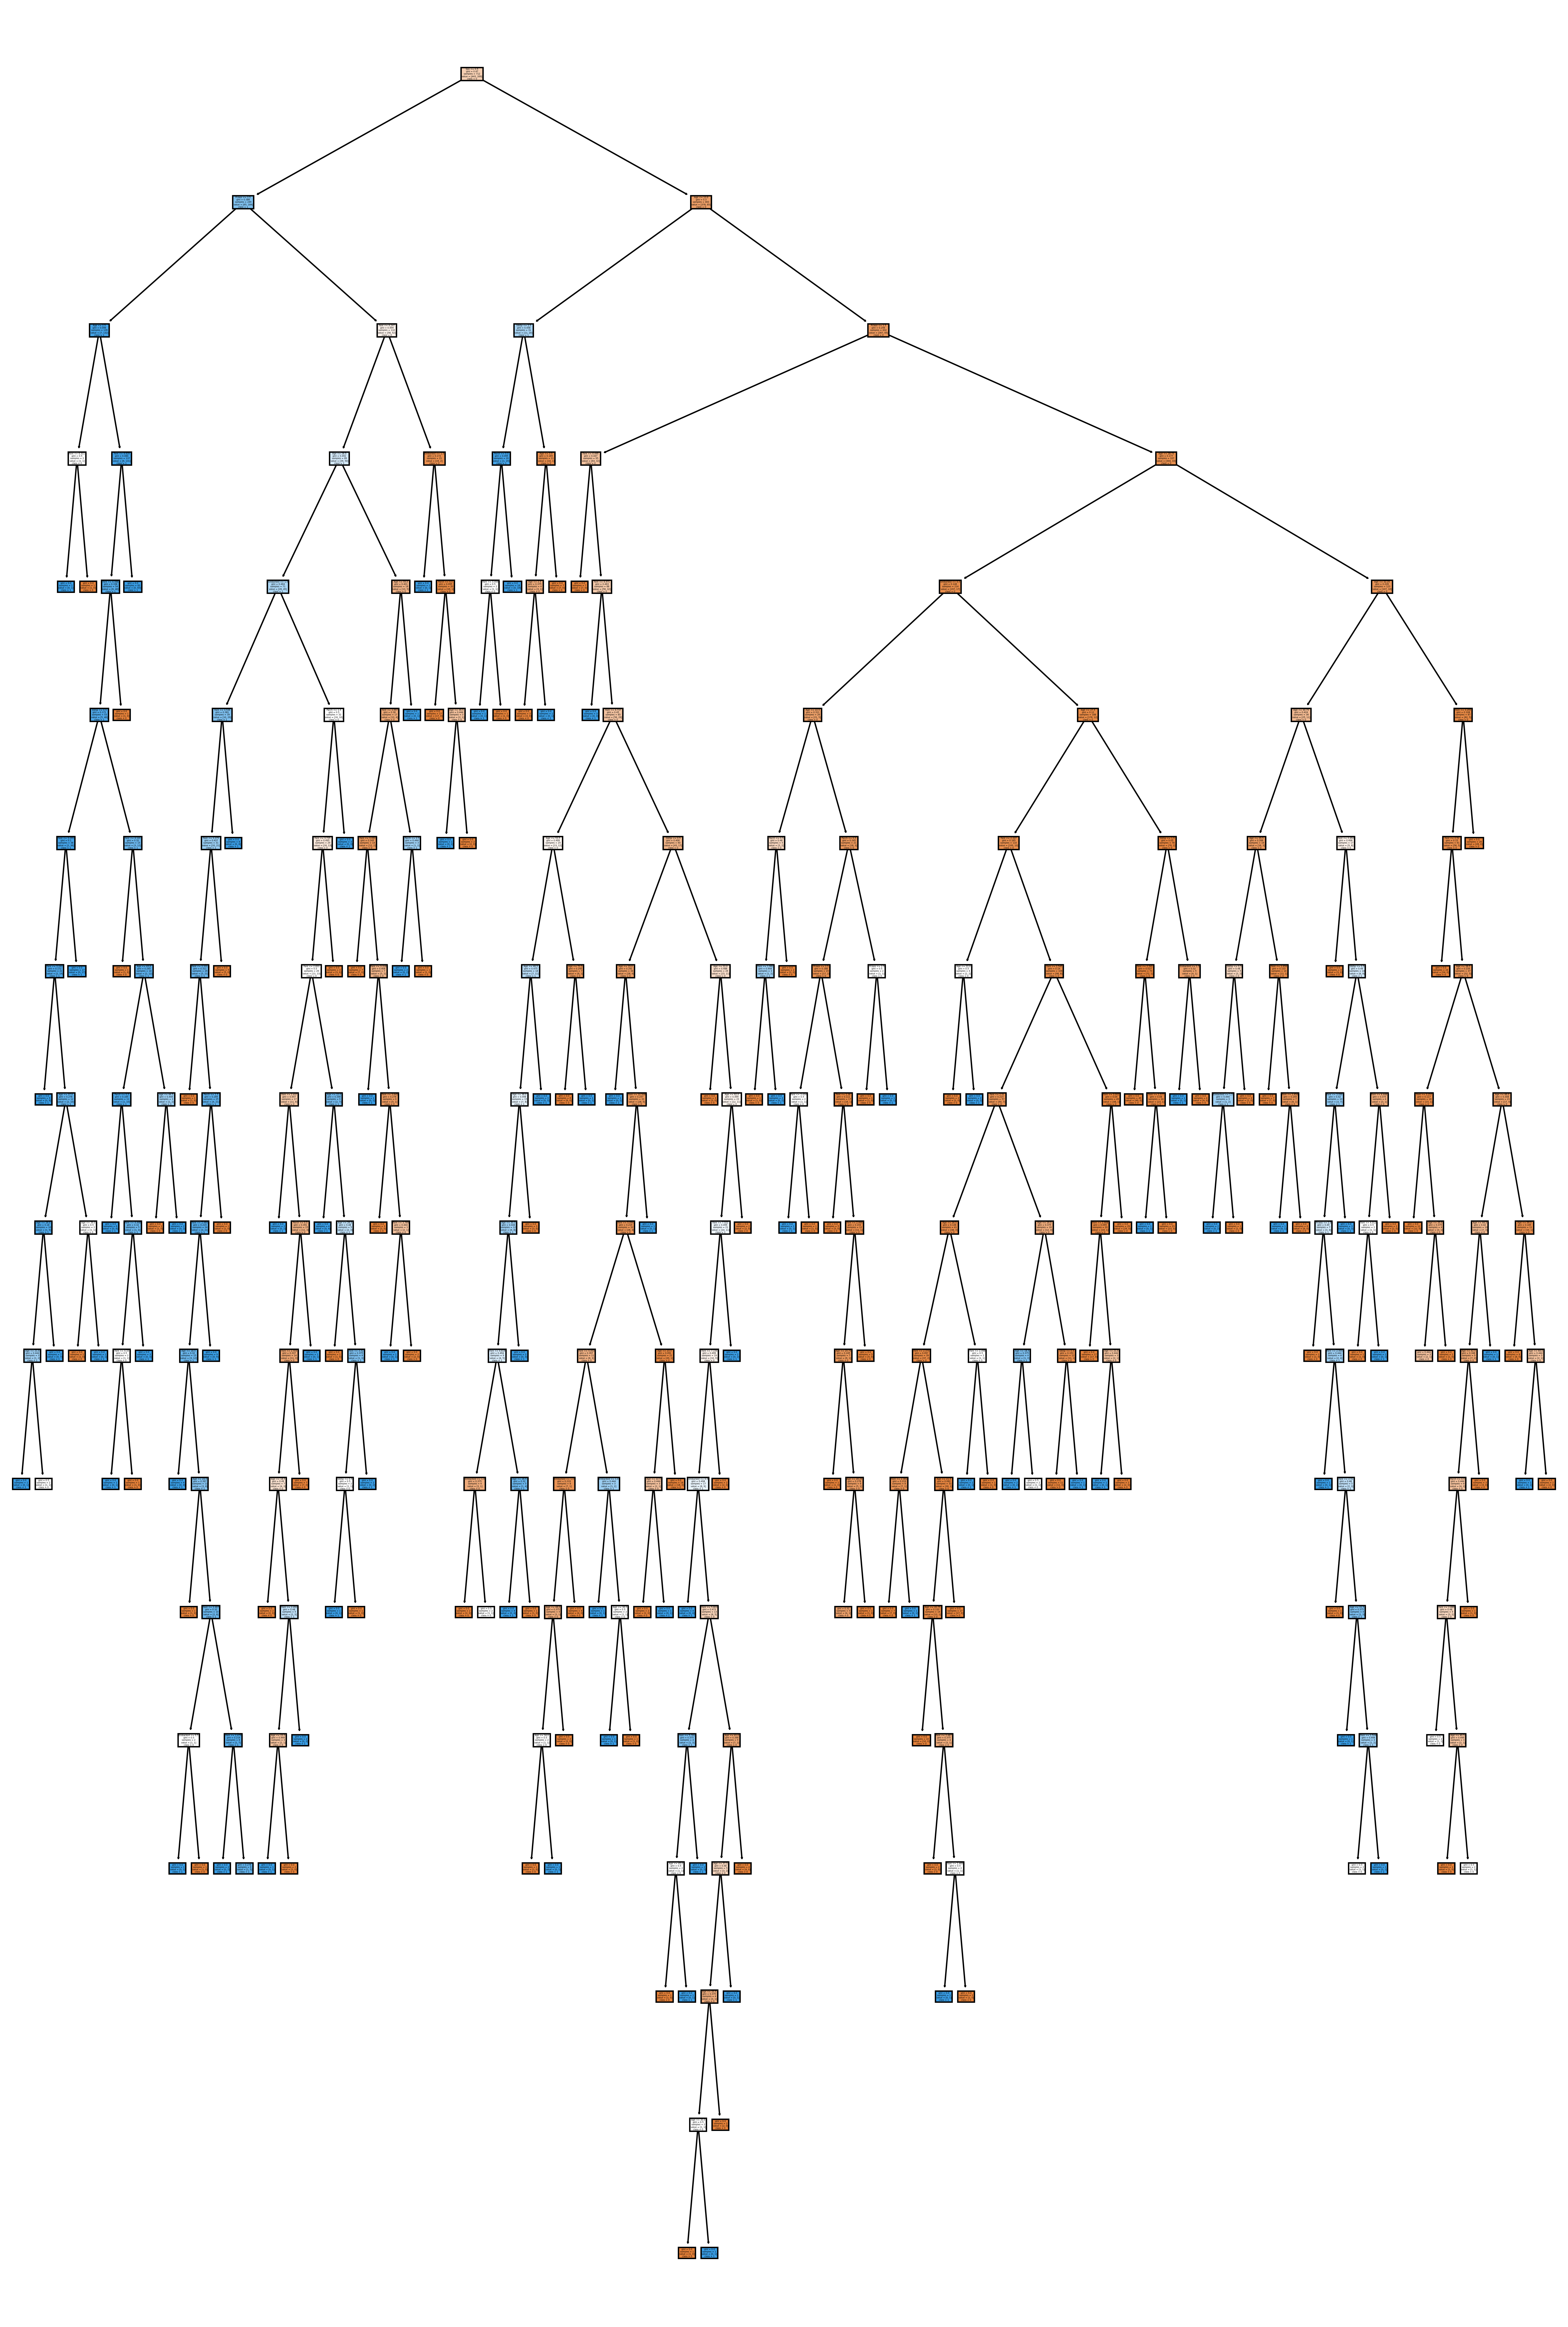

In [46]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,30),dpi=300)
plot_tree(model,filled=True,feature_names=x_train.columns.tolist(),class_names=["0","1"])
plt.show()

In [47]:
#Hyper parameter tuning
estimator=DecisionTreeClassifier(random_state=48)
param_grid={"criterion":["gini","entropy"],"max_depth":list(range(1,15))}

dt_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
dt_grid.fit(x_train,y_train)
dt=dt_grid.best_estimator_
dt

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=48)

In [48]:
# Important features
feats_ab = pd.DataFrame(data=dt.feature_importances_,index=x.columns,columns=["Importance"])

important_features_dt = feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_dt

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

**Creating Decision Tree Model with important parameters and important features** 

In [49]:

# Selecting train data
x_train_dt = x_train[important_features_dt]

# Modelling
dt = dt_grid.best_estimator_
dt.fit(x_train_dt,y_train)

# Evaluation
ypred_train = dt.predict(x_train_dt)

print("Train Accuracy : ",accuracy_score(y_train,ypred_train))
print("cv score :",cross_val_score(dt,x_train_dt,y_train,cv=5,scoring="accuracy").mean())

Train Accuracy :  0.8539325842696629
cv score : 0.8301093272924259


# Random Forest Classifier  (Algo 5)

**HPT**

**identify important features**

**Modelling**

**Evaluation**

In [50]:
# Hyper Parameter tunning

estimator = RandomForestClassifier(random_state=48)

param_grid = {"n_estimators":list(range(1,51))}

rf_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
rf_grid.fit(x_train,y_train)

rf = rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=48, random_state=48)

In [51]:
# Important features
feats_ab = pd.DataFrame(data=rf.feature_importances_,index=x.columns,columns=["Importance"])
important_features_rf = feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_rf

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [52]:
x_train_rf = x_train[important_features_rf]

# Modelling
rf = rf_grid.best_estimator_
rf.fit(x_train_rf,y_train)

# Evaluation
ypred_train = rf.predict(x_train_rf)

print("Train Accuracy : ",accuracy_score(y_train,ypred_train))
print("cv score:",cross_val_score(rf,x_train_rf,y_train,cv=5,scoring="accuracy").mean())

Train Accuracy :  0.9873595505617978
cv score: 0.823116320299419


# AdaBoost Classifier (Algo - 6)

In [53]:
estimator = AdaBoostClassifier(random_state=48)
param_grid = {"n_estimators":list(range(1,51))}

ab_grid = GridSearchCV(estimator,param_grid,scoring = "accuracy",cv=5)
ab_grid.fit(x_train,y_train)

ab=ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=8, random_state=48)

In [54]:
# Important features
feats_ab = pd.DataFrame(data=ab.feature_importances_,index=x.columns,columns=["Importance"])
important_features_ab=feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_ab

['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']

In [55]:
x_train_ab=x_train[important_features_ab]

# Modelling
ab = ab_grid.best_estimator_
ab.fit(x_train_ab,y_train)

# Evaluation
ypred_train = ab.predict(x_train_ab)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("cv score:",cross_val_score(ab,x_train_ab,y_train,cv=5,scoring="accuracy").mean())

Train Accuracy : 0.8300561797752809
cv score: 0.8231064709937949


# Gradient Boost Classifier (Algo - 7)

In [56]:
estimator = GradientBoostingClassifier(random_state=48)
param_grid = {"n_estimators":list(range(1,10)),"learning_rate":[0.1,0.2,0.3,0.4,0.5,0.7,0.8,0.9,1.0]}

gb_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
gb_grid.fit(x_train,y_train)

gb=gb_grid.best_estimator_
gb

GradientBoostingClassifier(learning_rate=0.2, n_estimators=5, random_state=48)

In [57]:
# Important features
feats_gb = pd.DataFrame(data=gb.feature_importances_,index=x.columns,columns=["Importance"])

important_features_gb = feats_gb[feats_gb["Importance"]>0].index.tolist()
important_features_gb

['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']

In [58]:
x_train_gb=x_train[important_features_gb]

gb=gb_grid.best_estimator_
gb.fit(x_train_gb,y_train)

ypred_train = gb.predict(x_train_gb)

print("Train Accuracy : " , accuracy_score(y_train,ypred_train))
print("CV Score:",cross_val_score(gb,x_train_gb,y_train,cv=5,scoring="accuracy").mean())

Train Accuracy :  0.8455056179775281
CV Score: 0.8441445878065597


# XGBoost Classifier (Algo - 8)

In [59]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [60]:
# Hyperparameter tuning
from xgboost import XGBClassifier
estimator = XGBClassifier()

param_grid = {"n_estimators":[10,20,40,100],"max_depth":[3,4,5],"gamma":[0,0.15,0.3,0.5,1]}

xgb_grid = GridSearchCV(estimator,param_grid, scoring="accuracy",cv=5)
xgb_grid.fit(x_train,y_train)

xgb = xgb_grid.best_estimator_
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [61]:
# Important features
feats_xgb = pd.DataFrame(data=xgb.feature_importances_,index=x.columns,columns=["Importance"])

important_features_xgb = feats_xgb[feats_xgb["Importance"]>0].index.tolist()
important_features_xgb

['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']

In [62]:
x_train_xgb = x_train[important_features_xgb]

# Modelling
xgb = xgb_grid.best_estimator_
xgb.fit(x_train_xgb,y_train)

# Evaluation

ypred_train  = xgb.predict(x_train_xgb)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score :",cross_val_score(xgb,x_train_xgb,y_train,cv=5,scoring="accuracy").mean())

Train Accuracy : 0.8764044943820225
CV Score : 0.8441642864178075


In [63]:
df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked'], dtype='object')

# Save the best Model

In [64]:
from joblib import dump
dump(gb,'Survived.joblib')

['Survived.joblib']

In [65]:
df=pd.read_excel(r"C:\Users\abhis\DATA SCIENCE SUBJECT & AI\kaggal projects\Titanic Project (classification)(Binary)\cleande Test.xlsx")
df

,Unnamed: 0,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,1.509188,1
1,1,3,0,47.0,1,0,1.475773,2
2,2,2,1,62.0,0,0,1.574861,1
3,3,3,1,27.0,0,0,1.540028,2
4,4,3,0,22.0,1,1,1.651554,2
...,...,...,...,...,...,...,...,...
413,413,3,1,27.0,0,0,1.517606,2
414,414,1,0,39.0,0,0,2.555086,0
415,415,3,1,38.5,0,0,1.486167,2
416,416,3,1,27.0,0,0,1.517606,2


In [66]:
df=df.drop(columns=['Parch'])
df

,Unnamed: 0,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,1,34.5,0,1.509188,1
1,1,3,0,47.0,1,1.475773,2
2,2,2,1,62.0,0,1.574861,1
3,3,3,1,27.0,0,1.540028,2
4,4,3,0,22.0,1,1.651554,2
...,...,...,...,...,...,...,...
413,413,3,1,27.0,0,1.517606,2
414,414,1,0,39.0,0,2.555086,0
415,415,3,1,38.5,0,1.486167,2
416,416,3,1,27.0,0,1.517606,2


In [67]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [68]:
df

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,1,34.5,0,1.509188,1
1,3,0,47.0,1,1.475773,2
2,2,1,62.0,0,1.574861,1
3,3,1,27.0,0,1.540028,2
4,3,0,22.0,1,1.651554,2
...,...,...,...,...,...,...
413,3,1,27.0,0,1.517606,2
414,1,0,39.0,0,2.555086,0
415,3,1,38.5,0,1.486167,2
416,3,1,27.0,0,1.517606,2


In [69]:
xgb.predict(df)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [70]:
abhi=pd.DataFrame(xgb.predict(df))
abhi

,0
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [71]:
abhi.to_excel("cleande-Titanic 200.xlsx")

In [72]:
pwd

'C:\\Users\\abhis\\DATA SCIENCE SUBJECT & AI\\kaggal projects\\Titanic Project (classification)(Binary)'